In [105]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

matplotlib.rcParams.update({'font.size':11,
                            'font.family':'serif'})
%matplotlib inline

In [43]:
variants = ['15_mins', '30_mins', '1_hour', '3_hour', '24_hour']
models = ['Dummy Regressor (Mean)', 'Linear Regression', 'Feed-Forward Neural Network', 'Random Forest Regressor', 'Cascade-LSTM']
variations = ['Structureless', 'Uni-directional', 'Root-less', 'Tree-LSTM', 'Cascade-LSTM']

In [53]:
cascade_lstm_log = pd.read_csv('../results/experiment_2.csv')
baseline_models = pd.read_csv('../results/experiment_2_base_models.csv')

In [55]:
cascade_lstm = cascade_lstm_log.groupby('variant').agg({'val_loss':'mean', 'val_mae':'mean'}).reset_index()
cascade_lstm.columns = ['crop', 'mse', 'mae']
cascade_lstm['model'] = 'Cascade-LSTM'

In [67]:
results = pd.concat([cascade_lstm, baseline_models])
results['model'] = pd.Categorical(results['model'], models)
results['crop'] = pd.Categorical(results['crop'], variants)

In [153]:
pd.options.display.float_format = '{:.4f}'.format
results.pivot(index='model', columns='crop', values='mse')

crop,15_mins,30_mins,1_hour,3_hour,24_hour
model,,,,,
Dummy Regressor (Mean),1.1052,1.0397,1.2799,1.0613,1.1796
Linear Regression,0.6224,0.6133,0.5632,0.4689,0.4042
Feed-Forward Neural Network,0.6772,0.5650,0.5159,0.3922,0.2378
Random Forest Regressor,0.5248,0.5306,0.4475,0.3585,0.2170
Cascade-LSTM,0.6041,0.5524,0.4097,0.3176,0.2191


In [69]:
results.pivot(index='model', columns='crop', values='mae')

crop,15_mins,30_mins,1_hour,3_hour,24_hour
model,,,,,
Dummy Regressor (Mean),0.8711,0.8631,0.9386,0.8629,0.8945
Linear Regression,0.6169,0.6144,0.5752,0.5164,0.4180
Feed-Forward Neural Network,0.6192,0.5618,0.5272,0.4509,0.3215
Random Forest Regressor,0.5614,0.5601,0.4905,0.4438,0.2968
Cascade-LSTM,0.5507,0.5409,0.5009,0.4356,0.3294


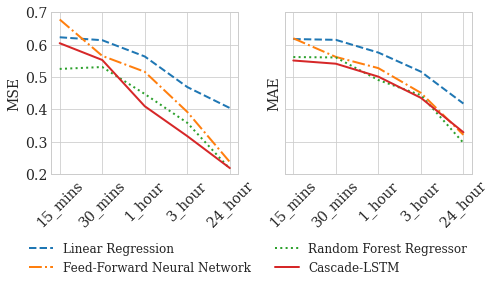

In [150]:
to_plot = ['Linear Regression', 'Feed-Forward Neural Network', 'Random Forest Regressor', 'Cascade-LSTM']
line_styles = ['--', '-.', ':', '-']
plot_mse = results.pivot(index='crop', columns='model', values='mse')
plot_mae = results.pivot(index='crop', columns='model', values='mae')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7,4), sharey=True)
plt.ylim([0.2, 0.7])
ax1.set_ylabel('MSE', fontsize=14)
ax2.set_ylabel('MAE', fontsize=14)

for a in (ax1,ax2):
    plt.sca(a)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14, rotation=45)

for model, style in zip(to_plot, line_styles):
    ax1.plot(plot_mse[model], linewidth=2, linestyle=style, label=model)
    ax2.plot(plot_mae[model], linewidth=2, linestyle=style, label=model)

fig.tight_layout(rect=[0, 0.15, 1, 1])
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)
fig.savefig('../plots/results.pdf')

In [60]:
variations_log = pd.read_csv('../results/experiment_2_variations.csv')
variations_log['variation'] = pd.Categorical(variations_log['variation'], variations)
var_results = variations_log.groupby('variation').mean()[['structureless', 'bi', 'deep', 'val_loss', 'val_mae']]
var_results

,structureless,bi,deep,val_loss,val_mae
variation,,,,,
Structureless,True,True,True,0.4621,0.5272
Uni-directional,False,False,True,0.5139,0.5483
Root-less,False,True,False,0.4201,0.5207
Tree-LSTM,False,False,False,0.5704,0.5482
Cascade-LSTM,False,True,True,0.4447,0.5132
